In [13]:

from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
import dendrocat
#importlib.reload(dendrocat)
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'

w51e_b6_conv_briggs = w51conv + 'w51e_briggs_B6_conv.fits'
w51e_b6_conv_robust0 = w51conv + 'w51e_robust0_B6_conv.fits'
w51e_b6_conv_superuniform = w51conv + 'w51e_superuniform_B6_conv.fits'

w51e_b6_calibrated2 = '/orange/adamginsburg/w51/alma/TaehwaYoo/w51_b6_e2_selfcal_tyoo_cont_20230822/w51e2.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal6.image.tt0.fits'
w51e_b6_calibrated = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.fits'
w51n_b6_calibrated = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.fits'

w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_bkg = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky_new.reg'
w51n_bkg = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'



### W51e ALMA-IMF

9.60617615981393e-05
[-1.10023576e-03 -1.08930331e-03 -1.07837086e-03 -1.06743841e-03
 -1.05650596e-03 -1.04557351e-03 -1.03464107e-03 -1.02370862e-03
 -1.01277617e-03 -1.00184372e-03 -9.90911268e-04 -9.79978819e-04
 -9.69046370e-04 -9.58113921e-04 -9.47181472e-04 -9.36249023e-04
 -9.25316573e-04 -9.14384124e-04 -9.03451675e-04 -8.92519226e-04
 -8.81586777e-04 -8.70654327e-04 -8.59721878e-04 -8.48789429e-04
 -8.37856980e-04 -8.26924531e-04 -8.15992082e-04 -8.05059632e-04
 -7.94127183e-04 -7.83194734e-04 -7.72262285e-04 -7.61329836e-04
 -7.50397387e-04 -7.39464937e-04 -7.28532488e-04 -7.17600039e-04
 -7.06667590e-04 -6.95735141e-04 -6.84802692e-04 -6.73870242e-04
 -6.62937793e-04 -6.52005344e-04 -6.41072895e-04 -6.30140446e-04
 -6.19207997e-04 -6.08275547e-04 -5.97343098e-04 -5.86410649e-04
 -5.75478200e-04 -5.64545751e-04 -5.53613301e-04 -5.42680852e-04
 -5.31748403e-04 -5.20815954e-04 -5.09883505e-04 -4.98951056e-04
 -4.88018606e-04 -4.77086157e-04 -4.66153708e-04 -4.55221259e-04
 -4.

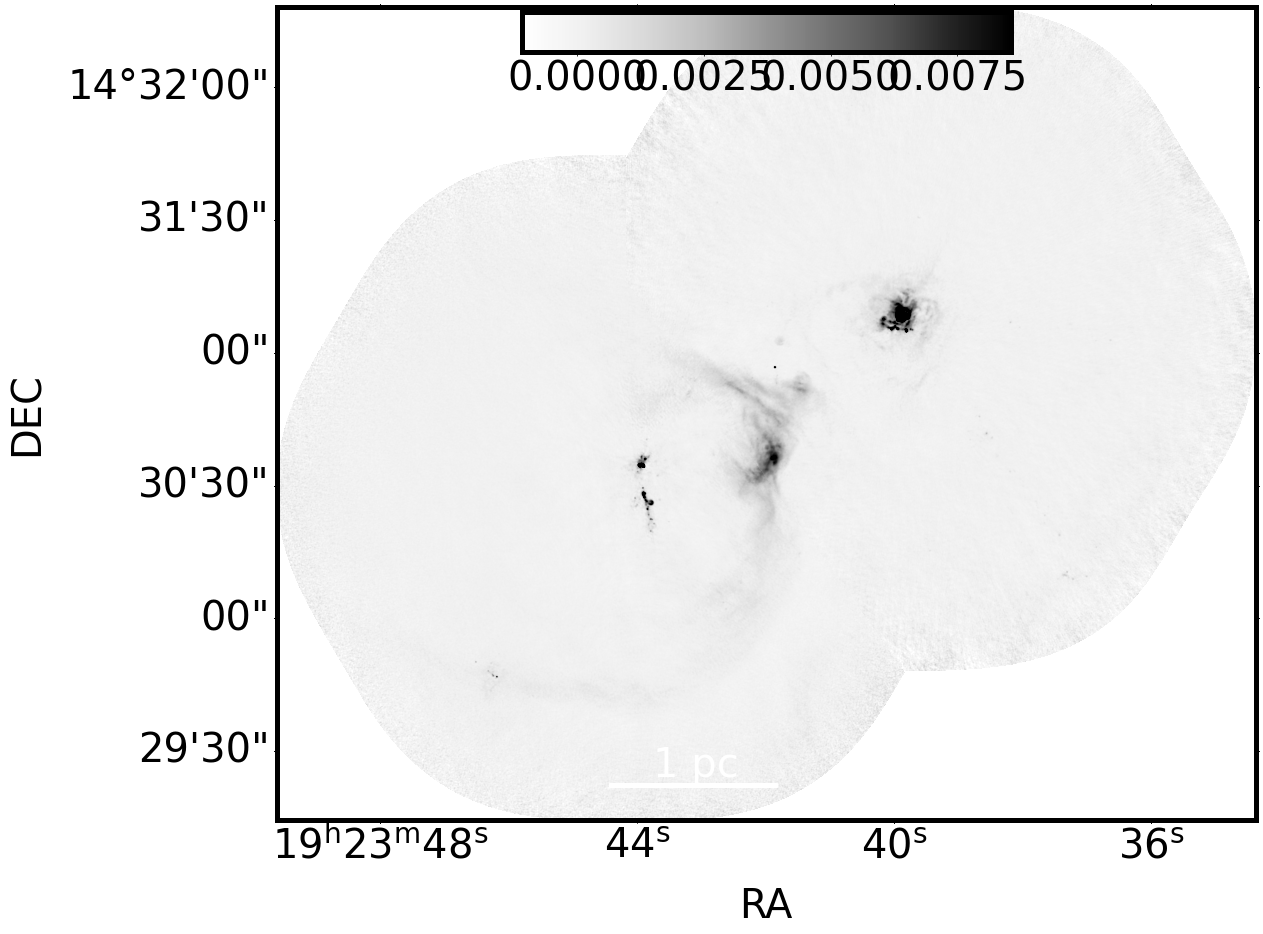

In [14]:
from reproject import reproject_interp, reproject_adaptive
from reproject.mosaicking import find_optimal_celestial_wcs
import astropy.units as u
from matplotlib.patches import Rectangle, Ellipse
from matplotlib import colors
import matplotlib as mpl
from numpy.ma import masked_array
from astropy import stats
from itertools import chain
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams['axes.labelsize']=40
plt.rcParams['xtick.labelsize']=40
plt.rcParams['ytick.labelsize']=40
plt.rcParams['axes.titlesize']=40
mpl.rcParams['axes.linewidth'] = 5

def get_noise_from_background(noiseregionfile, image, wcsNB):
    noiseregion = Regions.read(noiseregionfile,format='ds9')
    container = []
    for reg in noiseregion:
        pix_reg = reg.to_pixel(wcsNB)
        noisemask = pix_reg.to_mask()
        noiseim = noisemask.cutout(image)
        container.append(noiseim.flatten())
    noiseim = list(chain.from_iterable(container))
    std = stats.mad_std(noiseim,ignore_nan=True)
    return std

def cut_image_above_line(image, point1, point2, enditer,alongdir='x'):
    if alongdir=='x':
        iternum = enditer - point1[0]
            
    else:
        iternum = point1[1] - point2[1]
        
    aa = (point2[1] - point2[0]) / (point1[1]-point1[0])
    bb = point2[1] - aa * point2[0]
    if iternum>0:
        step=1
    else:
        step=-1
    iter = np.arange(0, iternum, step)
    for i in iter:
      
        if alongdir=='x':
            start = point1[0]
            yy = int(aa * (start+i) + bb)
            image[yy:,start+i] = np.nan
        
        else:
            start = np.min([point1[1], point2[1]])
            yy = aa * (start+i) + bb
            image[yy:,start+i] = np.nan

def add_scale_bar(ax, xpos,ypos,scale, pixel_scale, dist, unit='pc',height=20,color='w',pad=40,size=40,xoffset=0.05):
    phy_pix_scale = (pixel_scale * dist).to(u.kpc*u.rad)/u.rad
    print(phy_pix_scale.to(u.au))
    scaled_scale = (scale/phy_pix_scale).to(u.rad/u.rad)
    print(scaled_scale)
    ax.add_patch(Rectangle((xpos,ypos),scaled_scale.value,height,color=color))
    ax.text(xpos+(0.4+xoffset)*scaled_scale, ypos+pad, '%d %s'%(scale.value, unit), color=color,fontsize=size)
                
def add_beam(ax,xpos,ypos,beam, pixel_scale,color='w',square=False,square_size=800):
    width = beam.major / pixel_scale
    height = beam.minor /pixel_scale
    angle = beam.pa
    ax.add_patch(Ellipse((xpos,ypos),width.value,height.value,180-angle.value,color=color))
    if square:
        ax.scatter(xpos,ypos,facecolor='none', edgecolor=color,s=square_size,marker='s')
        
fitsdata_w51e = fits.open(w51e_b3_almaimf)
image_w51e = fitsdata_w51e[0].data
if len(image_w51e.shape)>2:
    image_w51e = fitsdata_w51e[0].data[0][0]
wcs_w51e = WCS(fitsdata_w51e[0].header,naxis=2)

fitsdata_w51n = fits.open(w51n_b3_almaimf)
image_w51n = fitsdata_w51n[0].data
if len(image_w51n.shape)>2:
    image_w51n = fitsdata_w51n[0].data[0][0]
wcs_w51n = WCS(fitsdata_w51n[0].header,naxis=2)


scale_w51e = wcs_w51e.proj_plane_pixel_scales()[0]

wcs_out, shape_out = find_optimal_celestial_wcs([(image_w51e, wcs_w51e),(image_w51n, wcs_w51n)])

image_w51n_reprojected, footprint = reproject_interp((image_w51n, wcs_w51n), wcs_out, shape_out)

cut_image_above_line(image_w51e, [2410, 4409], [4091, 1290], 4510)
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.3,0.3,0.68,0.68], projection=wcs_w51e)

w51n_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg', image_w51n, wcs_w51n)
w51e_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg', image_w51e, wcs_w51e)

vmin = -0.00110023576011658
vmax = 0.008559992119315504
avstd = (w51n_std+w51e_std)/2
print(avstd)
colors1 = plt.cm.binary(np.linspace(vmin, 3*avstd,128))
print(np.linspace(vmin, 3*avstd,128))
colors2 = plt.cm.inferno(np.linspace(3*avstd, vmax,128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


ax1.imshow(image_w51n_reprojected, origin='lower',cmap=plt.get_cmap('Greys'),vmin=vmin,vmax=vmax)
im = ax1.imshow(image_w51e, origin='lower',cmap=plt.get_cmap('Greys'),vmin=vmin,vmax=vmax)
add_scale_bar(ax1,2300,600, 1*u.pc, scale_w51e, 5.41*u.kpc,xoffset=-0.14, pad=60)
axins1 = inset_axes(
    ax1,
    width="50%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper center",
)
plt.colorbar(im, cax=axins1, orientation="horizontal")
ax1.set_xlim(300,6200)
ax1.set_ylim(400,5300)
ax1.set_xlabel('RA' ,fontsize=40)
ax1.set_ylabel('DEC', fontsize=40)
plt.savefig('overview_w51e_almaimf_b3.png')


202.8750000000649 AU
1016.7088416366254


AttributeError: 'AxesParasite' object has no attribute 'set_ticks'

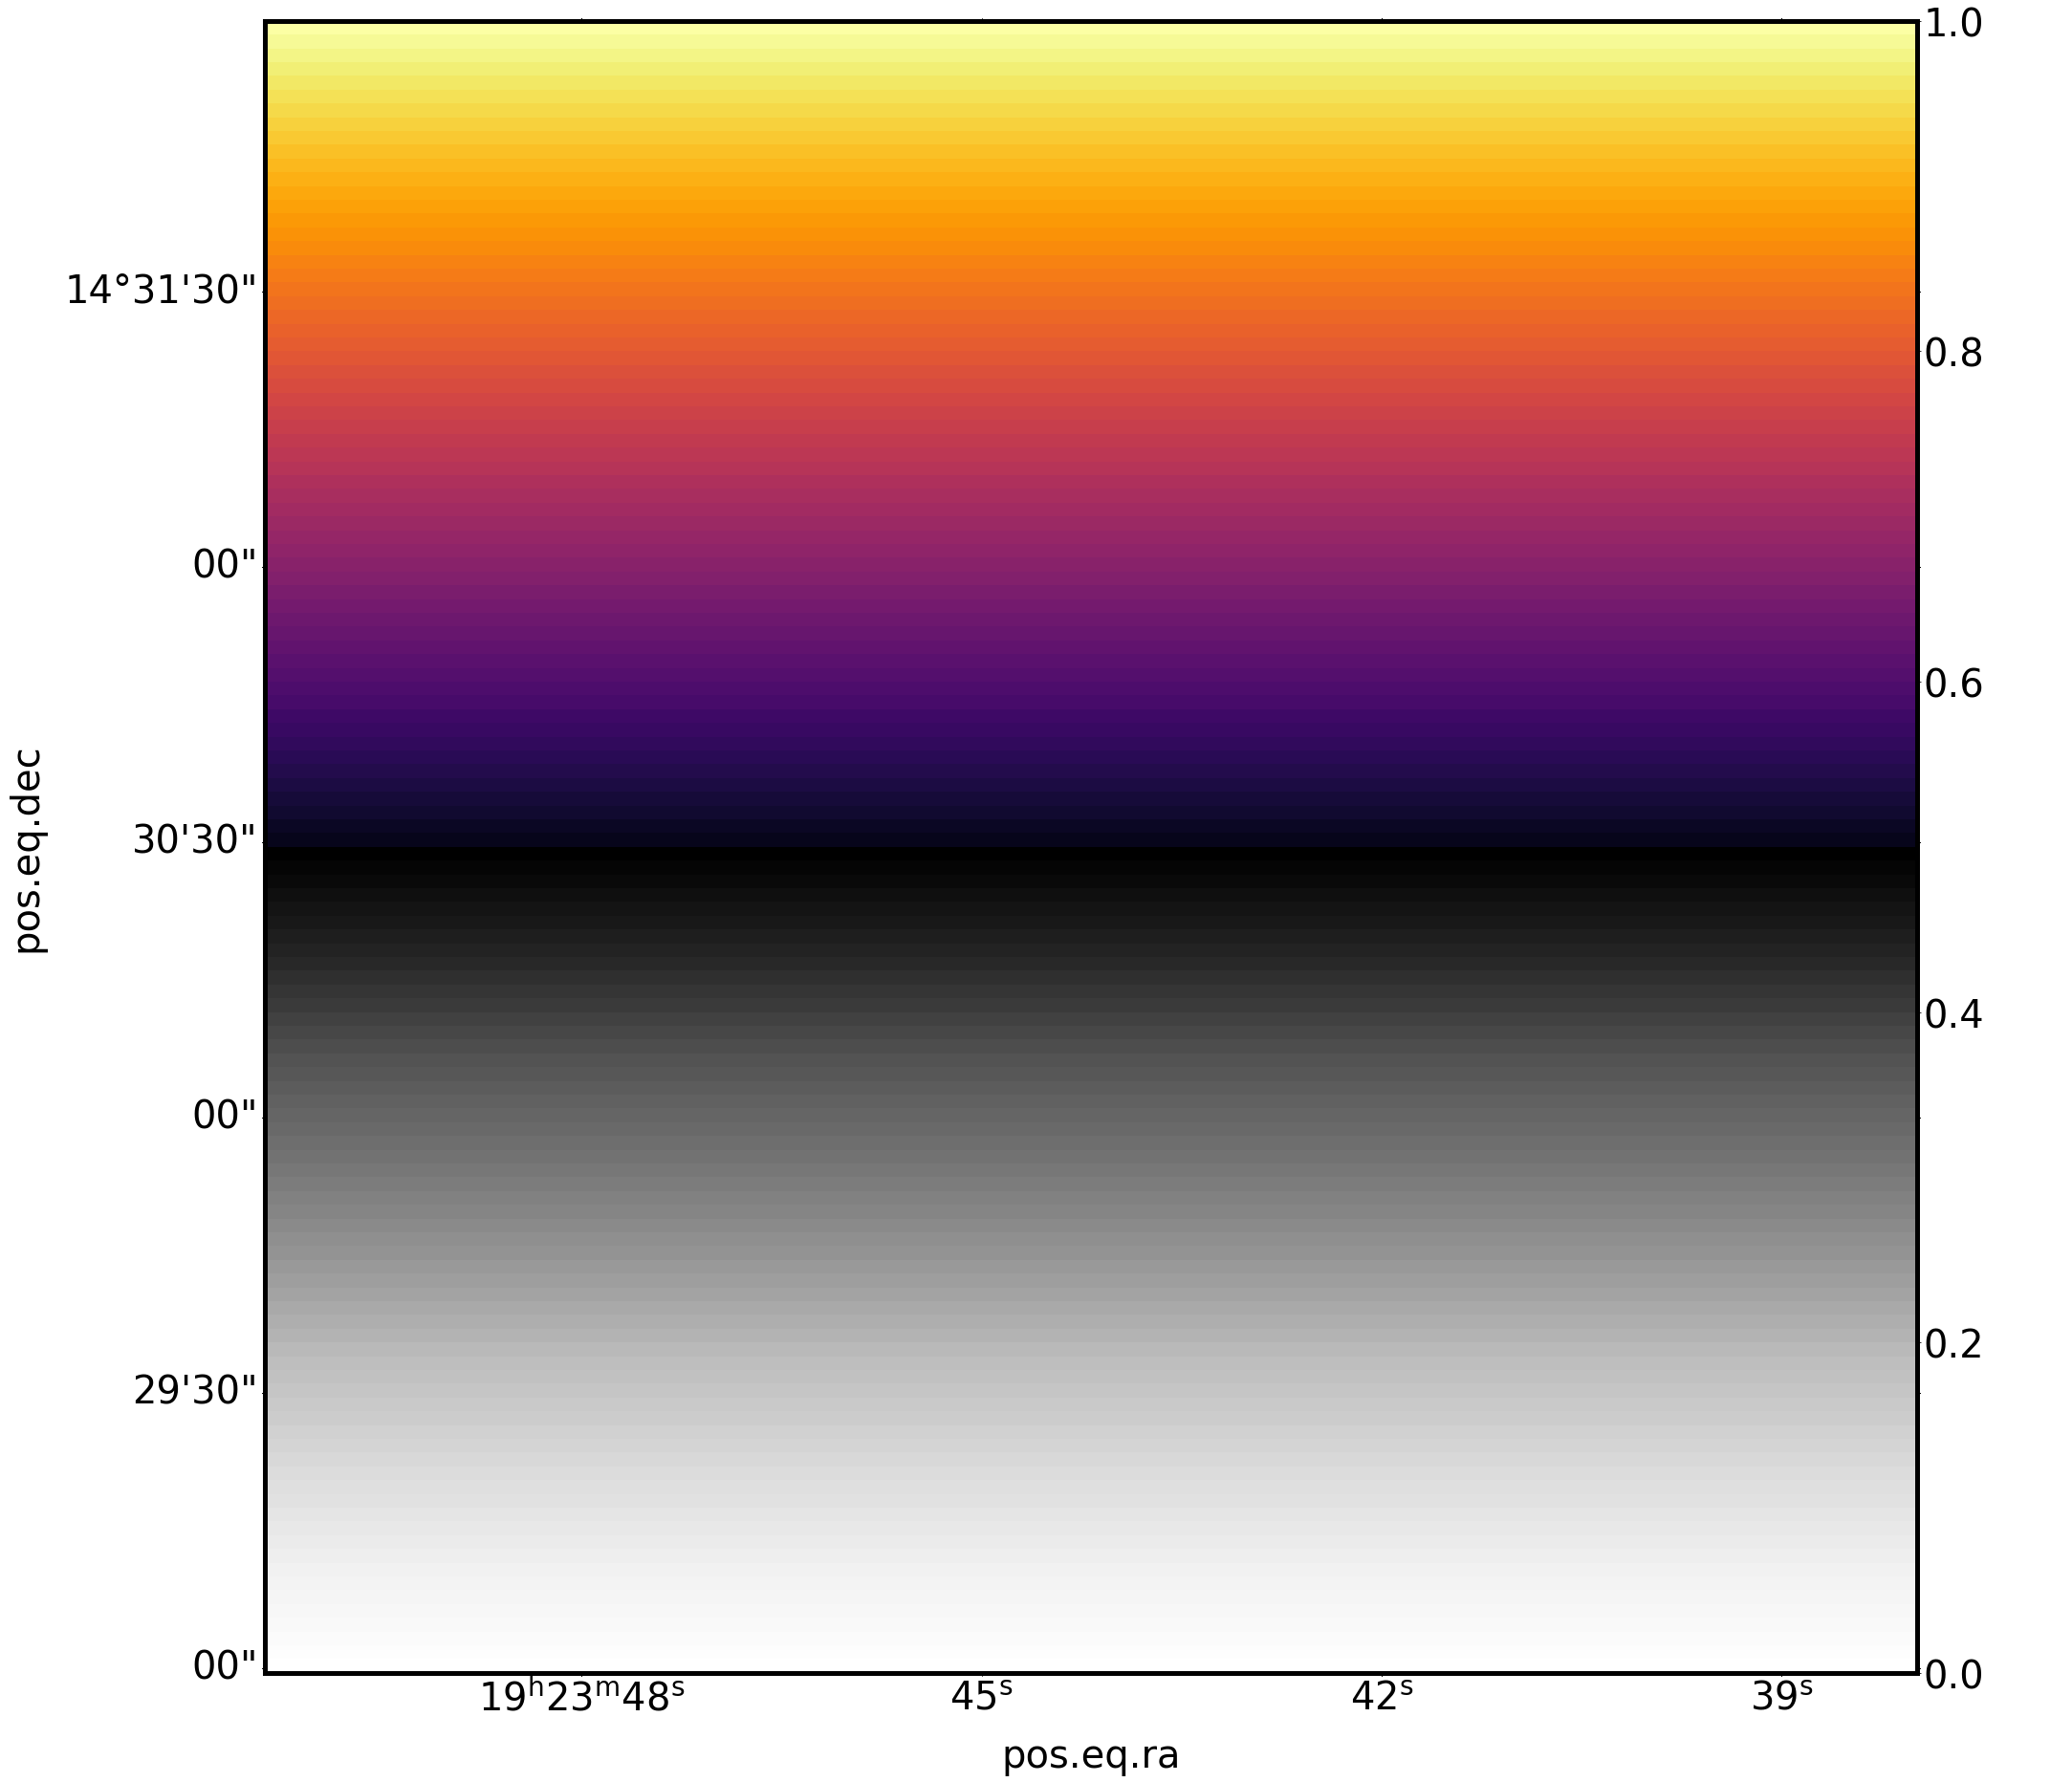

In [23]:
from radio_beam import Beam

fig = plt.figure(figsize=(40,40))
ax1 = fig.add_axes([0.2,0.2,0.6,0.6], projection=wcs_w51e)

w51n_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg', image_w51n, wcs_w51n)
w51e_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg', image_w51e, wcs_w51e)


avstd = (w51n_std+w51e_std)/2
vmin = -0.00050023576011658
vmax = 0.01259992119315504
N1=60 ; N2=60
cmap = {name:plt.get_cmap(name) for name in ('Greys', 'inferno')}

levels = np.concatenate([np.linspace(vmin, 15*avstd, N1, endpoint=False),
                         np.linspace(15*avstd, vmax, N2+1, endpoint=True)])  # 2
colors = np.concatenate([cmap['Greys'](np.linspace(0, 1, N1)), cmap['inferno'](np.linspace(0.05, 1, N1))]) 
                        # 3

cmap, norm = mcolors.from_levels_and_colors(levels, colors)


def make_brightness_temp(x,freq):
    equiv = u.brightness_temperature(freq)
    return x.to(u.K, equivalencies=equiv)




ax1.imshow(image_w51n_reprojected, origin='lower',cmap=cmap,norm=norm)
im = ax1.imshow(image_w51e, origin='lower',cmap=cmap,norm=norm)
add_scale_bar(ax1,4000,1000, 1*u.pc, scale_w51e, 5.41*u.kpc,height=50,xoffset=-0.01, pad=100,color='k')
axins1 = inset_axes(
    ax1,
    width="4%",  # width: 50% of parent_bbox width
    height="100%",  # height: 5%
    loc="lower left",
    bbox_to_anchor=(1.05, 0., 1, 1),
    bbox_transform=ax1.transAxes,
    borderpad=0
)
beam_almaimf = Beam.from_fits_header(fitsdata_w51e[0].header)  
beam_area = beam_almaimf.sr
tick = [-0.0005,0,0.0005,0.0010,0.0020,0.0050,0.0100]*u.mJy/beam_area
temp_tick = make_brightness_temp(tick, 93.17*u.GHz).value
cbar = plt.colorbar(im, cax=axins1, ticks=[-0.0005,0,0.0005,0.0010,0.0020,0.0050,0.0100] )
cbar.set_label('Flux (mJy/beam)')
cbar.ax.tick_params(length=15, width=4, which="major")

axins2 = axins1.twinx()
axins2.set_yticks(temp_tick)
ax1.set_xlim(800,5200)
ax1.set_ylim(800,4300)
ax1.set_xlabel('RA (ICRS)' ,fontsize=60)
ax1.set_ylabel('DEC (ICRS)', fontsize=60)
plt.savefig('overview_w51e_almaimf_b3.png')




9.60617615981393e-05
[-1.10023576e-03 -1.08930331e-03 -1.07837086e-03 -1.06743841e-03
 -1.05650596e-03 -1.04557351e-03 -1.03464107e-03 -1.02370862e-03
 -1.01277617e-03 -1.00184372e-03 -9.90911268e-04 -9.79978819e-04
 -9.69046370e-04 -9.58113921e-04 -9.47181472e-04 -9.36249023e-04
 -9.25316573e-04 -9.14384124e-04 -9.03451675e-04 -8.92519226e-04
 -8.81586777e-04 -8.70654327e-04 -8.59721878e-04 -8.48789429e-04
 -8.37856980e-04 -8.26924531e-04 -8.15992082e-04 -8.05059632e-04
 -7.94127183e-04 -7.83194734e-04 -7.72262285e-04 -7.61329836e-04
 -7.50397387e-04 -7.39464937e-04 -7.28532488e-04 -7.17600039e-04
 -7.06667590e-04 -6.95735141e-04 -6.84802692e-04 -6.73870242e-04
 -6.62937793e-04 -6.52005344e-04 -6.41072895e-04 -6.30140446e-04
 -6.19207997e-04 -6.08275547e-04 -5.97343098e-04 -5.86410649e-04
 -5.75478200e-04 -5.64545751e-04 -5.53613301e-04 -5.42680852e-04
 -5.31748403e-04 -5.20815954e-04 -5.09883505e-04 -4.98951056e-04
 -4.88018606e-04 -4.77086157e-04 -4.66153708e-04 -4.55221259e-04
 -4.

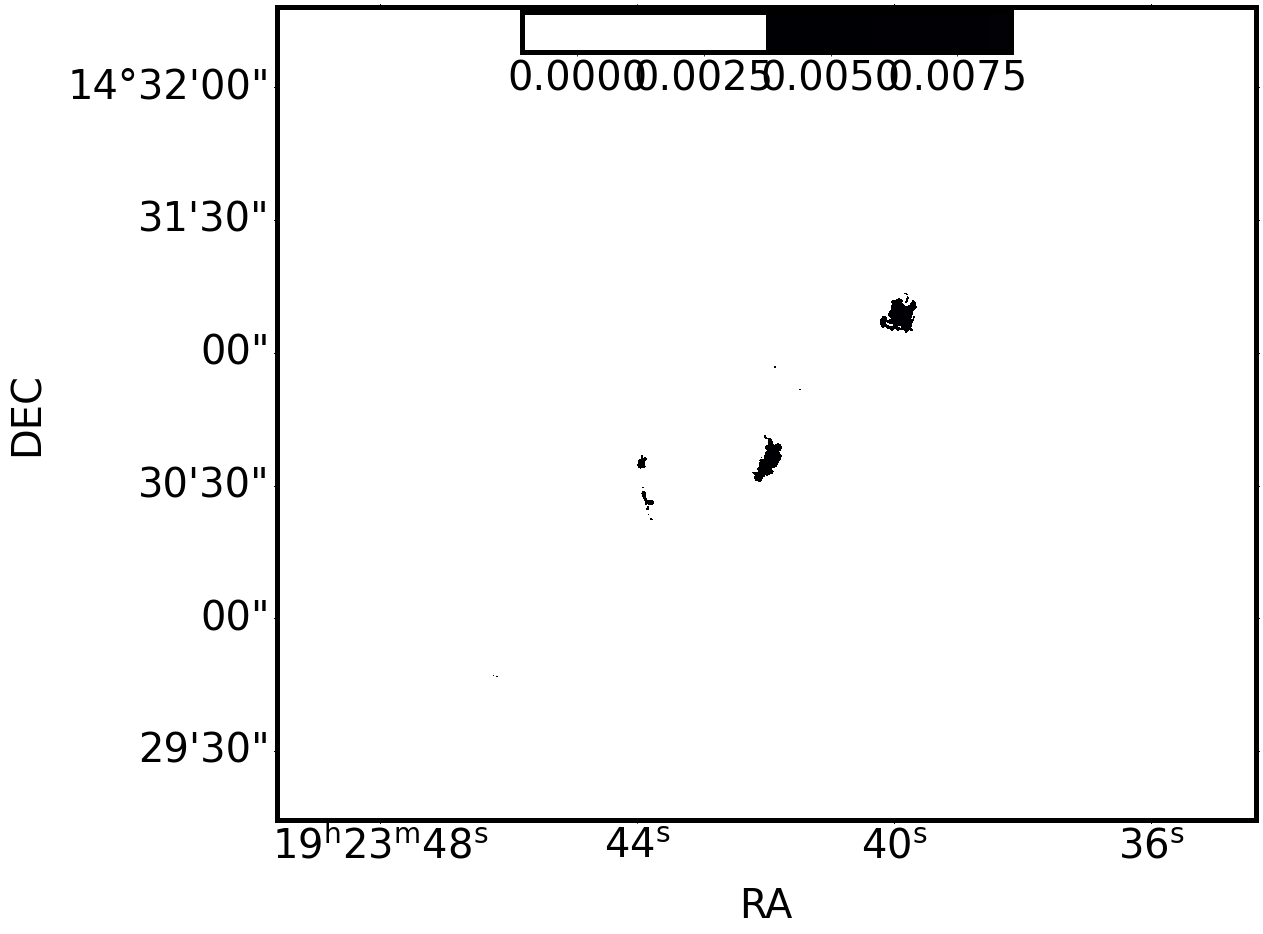

In [16]:



fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.3,0.3,0.68,0.68], projection=wcs_w51e)

w51n_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_b3_rms.reg', image_w51n, wcs_w51n)
w51e_std = get_noise_from_background('/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_b3_rms.reg', image_w51e, wcs_w51e)

vmin = -0.00110023576011658
vmax = 0.008559992119315504
avstd = (w51n_std+w51e_std)/2
print(avstd)
colors1 = plt.cm.binary(np.linspace(vmin, 3*avstd,128))
print(np.linspace(vmin, 3*avstd,128))
colors2 = plt.cm.inferno(np.linspace(3*avstd, vmax,128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


ax1.imshow(image_w51n_reprojected, origin='lower',cmap=mymap,vmin=vmin,vmax=vmax)
im = ax1.imshow(image_w51e, origin='lower',cmap=mymap,vmin=vmin,vmax=vmax)
add_scale_bar(ax1,2300,600, 1*u.pc, scale_w51e, 5.41*u.kpc,xoffset=-0.14, pad=60)
axins1 = inset_axes(
    ax1,
    width="50%",  # width: 50% of parent_bbox width
    height="5%",  # height: 5%
    loc="upper center",
)
plt.colorbar(im, cax=axins1, orientation="horizontal")
ax1.set_xlim(300,6200)
ax1.set_ylim(400,5300)
ax1.set_xlabel('RA' ,fontsize=40)
ax1.set_ylabel('DEC', fontsize=40)
plt.savefig('overview_w51e_almaimf_b3.png')




202.8750000000649 AU
1016.7088416366254


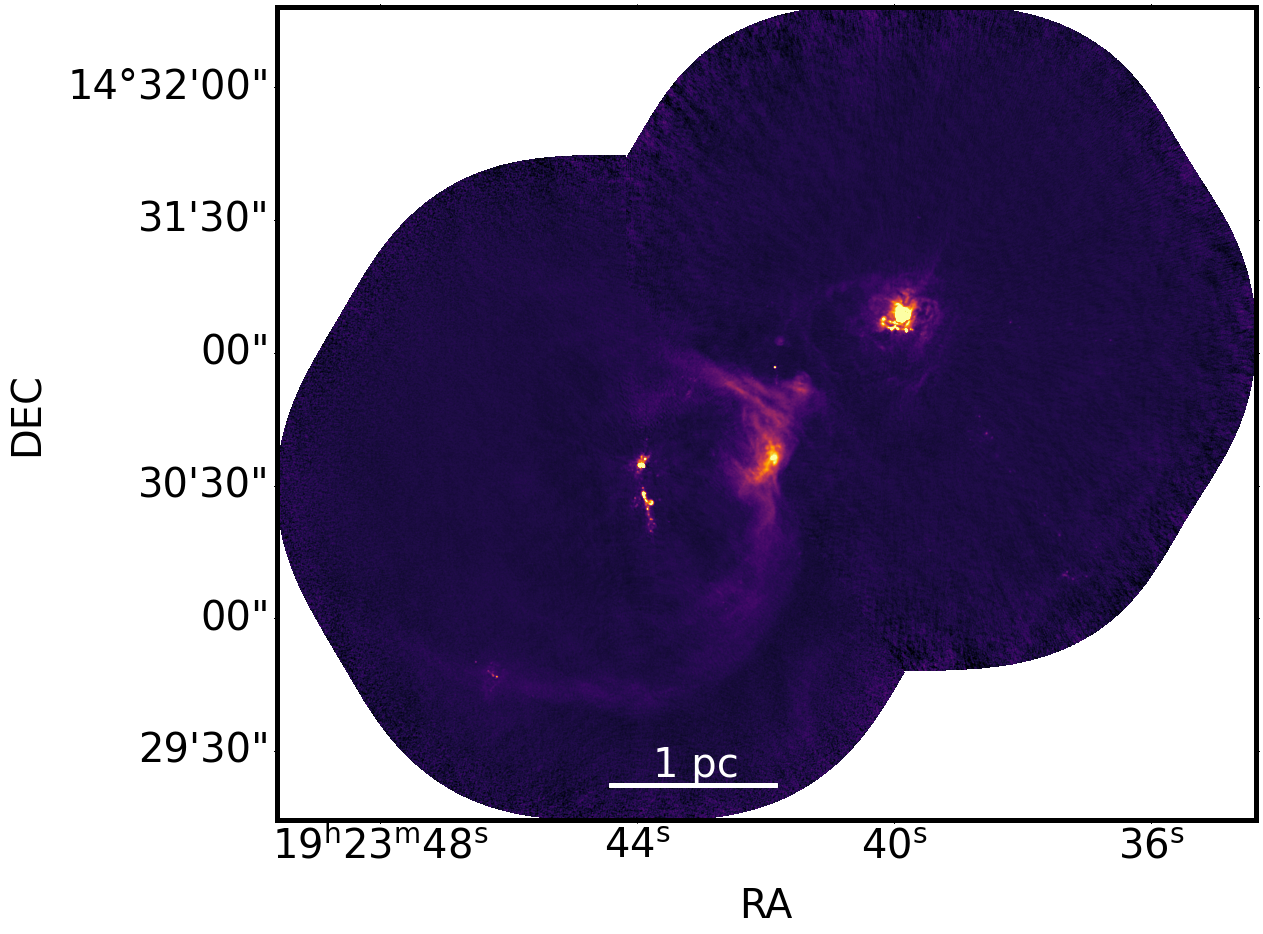

In [17]:
fitsdata_w51e = fits.open(w51e_b3_almaimf)
image_w51e = fitsdata_w51e[0].data
if len(image_w51e.shape)>2:
    image_w51e = fitsdata_w51e[0].data[0][0]
wcs_w51e = WCS(fitsdata_w51e[0].header,naxis=2)

fitsdata_w51n = fits.open(w51n_b3_almaimf)
image_w51n = fitsdata_w51n[0].data
if len(image_w51n.shape)>2:
    image_w51n = fitsdata_w51n[0].data[0][0]
wcs_w51n = WCS(fitsdata_w51n[0].header,naxis=2)


scale_w51e = wcs_w51e.proj_plane_pixel_scales()[0]

wcs_out, shape_out = find_optimal_celestial_wcs([(image_w51e, wcs_w51e),(image_w51n, wcs_w51n)])

image_w51n_reprojected, footprint = reproject_interp((image_w51n, wcs_w51n), wcs_out, shape_out)

cut_image_above_line(image_w51e, [2410, 4409], [4091, 1290], 4510)
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.3,0.3,0.68,0.68], projection=wcs_w51e)


ax1.imshow(image_w51n_reprojected, origin='lower',cmap=plt.get_cmap('inferno'),vmin=-0.00110023576011658,vmax=0.008559992119315504)

ax1.imshow(image_w51e, origin='lower',cmap=plt.get_cmap('inferno'),vmin=-0.00110023576011658,vmax=0.008559992119315504)
add_scale_bar(ax1,2300,600, 1*u.pc, scale_w51e, 5.41*u.kpc,xoffset=-0.14, pad=60)
ax1.set_xlim(300,6200)
ax1.set_ylim(400,5300)
ax1.set_xlabel('RA' ,fontsize=40)
ax1.set_ylabel('DEC', fontsize=40)
plt.savefig('overview_w51e_almaimf_b3_twocolor.png')

21.639999999997837 AU
231.05360443625227


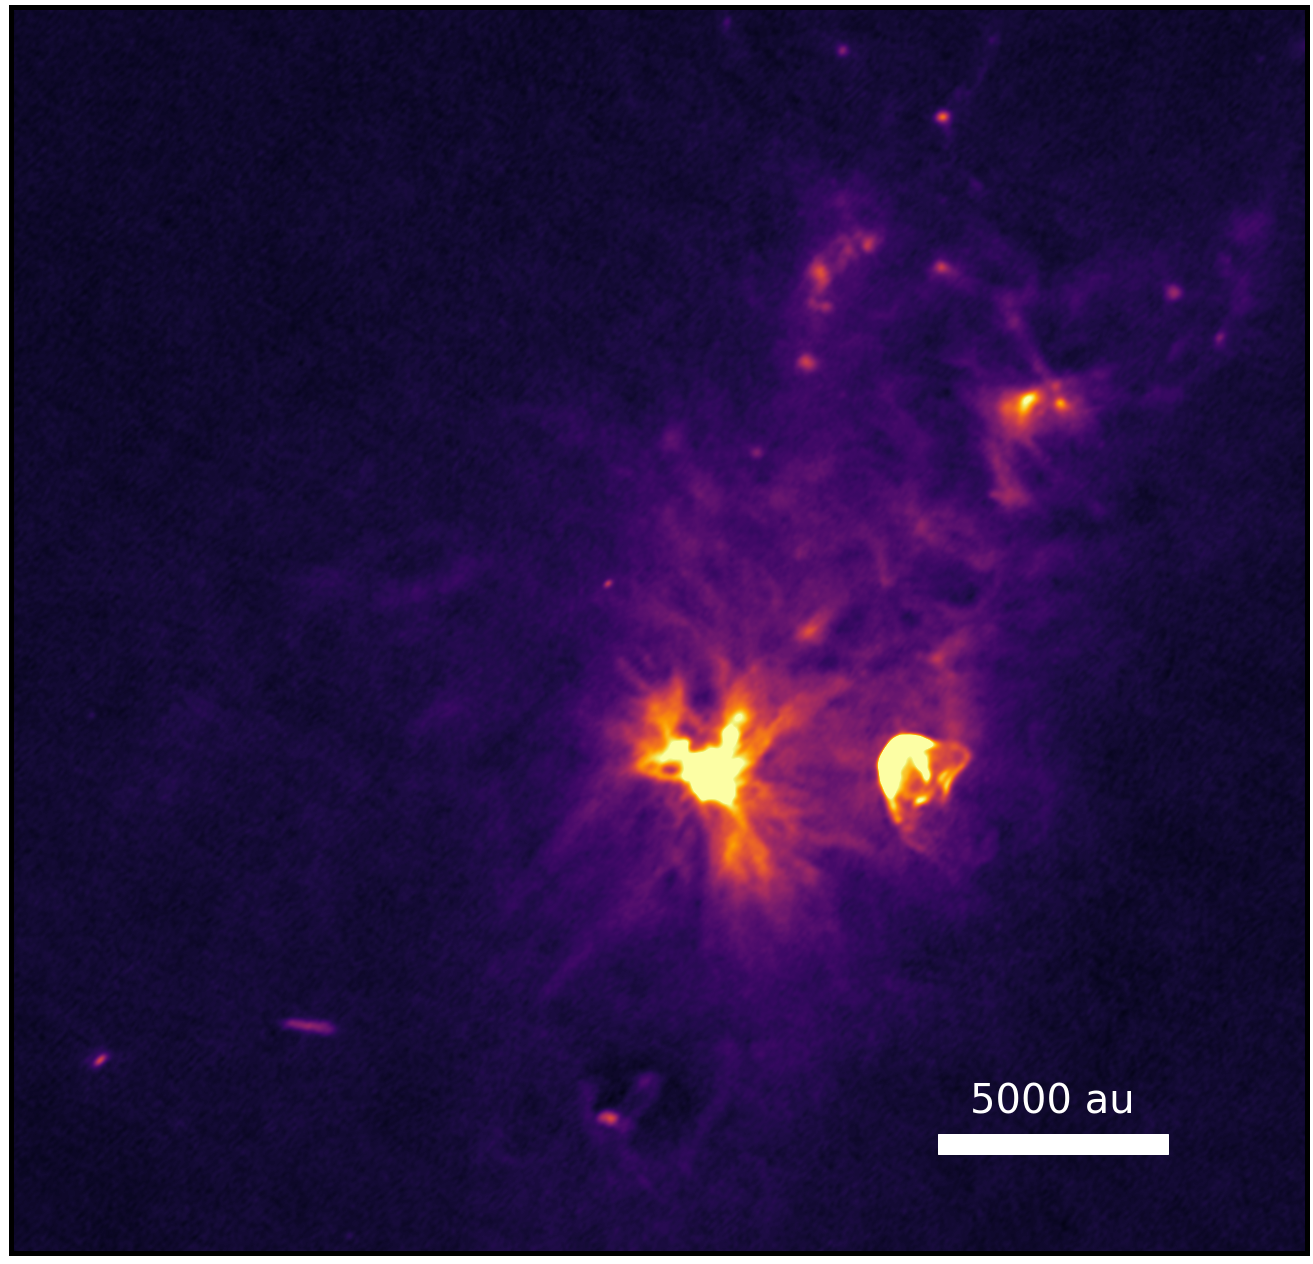

In [18]:
fitsdata_w51e_almaimf_b6 = fits.open(w51e_b6_almaimf)
image_w51e_almaimf_b6 = fitsdata_w51e_almaimf_b6[0].data
if len(image_w51e_almaimf_b6.shape)>2:
    image_w51e_almaimf_b6 = fitsdata_w51e_almaimf_b6[0].data[0][0]
wcs_w51e_almaimf_b6 = WCS(fitsdata_w51e_almaimf_b6[0].header,naxis=2)


fitsdata_w51e_hr_b6 = fits.open(w51e_b6_calibrated_pbcor)
image_w51e_hr_b6 = fitsdata_w51e_hr_b6[0].data
if len(image_w51e_hr_b6.shape)>2:
    image_w51e_hr_b6 = fitsdata_w51e_hr_b6[0].data[0][0]
wcs_w51e_hr_b6 = WCS(fitsdata_w51e_hr_b6[0].header,naxis=2)

scale_w51e_hr = wcs_w51e_hr_b6.proj_plane_pixel_scales()[0]


fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51e_hr_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           vmin=-0.00031168037547342546,vmax=0.003998109940627469)
xylim1 = [6350, 6750]
xylim2 = [7650, 8000]
ax1.set_xlim(xylim1[0], xylim2[0])
ax1.set_ylim(xylim1[1], xylim2[1])
ax1.set_xticks([])
ax1.set_yticks([])
xylim = np.vstack((xylim1, xylim2)).T

add_scale_bar(ax1,7280,6850, 5000*u.au,scale_w51e_hr, 5.41*u.kpc,xoffset=-0.26,unit='au')

plt.savefig('w51e_north_hr.png')




AttributeError: 'numpy.ndarray' object has no attribute 'PowerNorm'

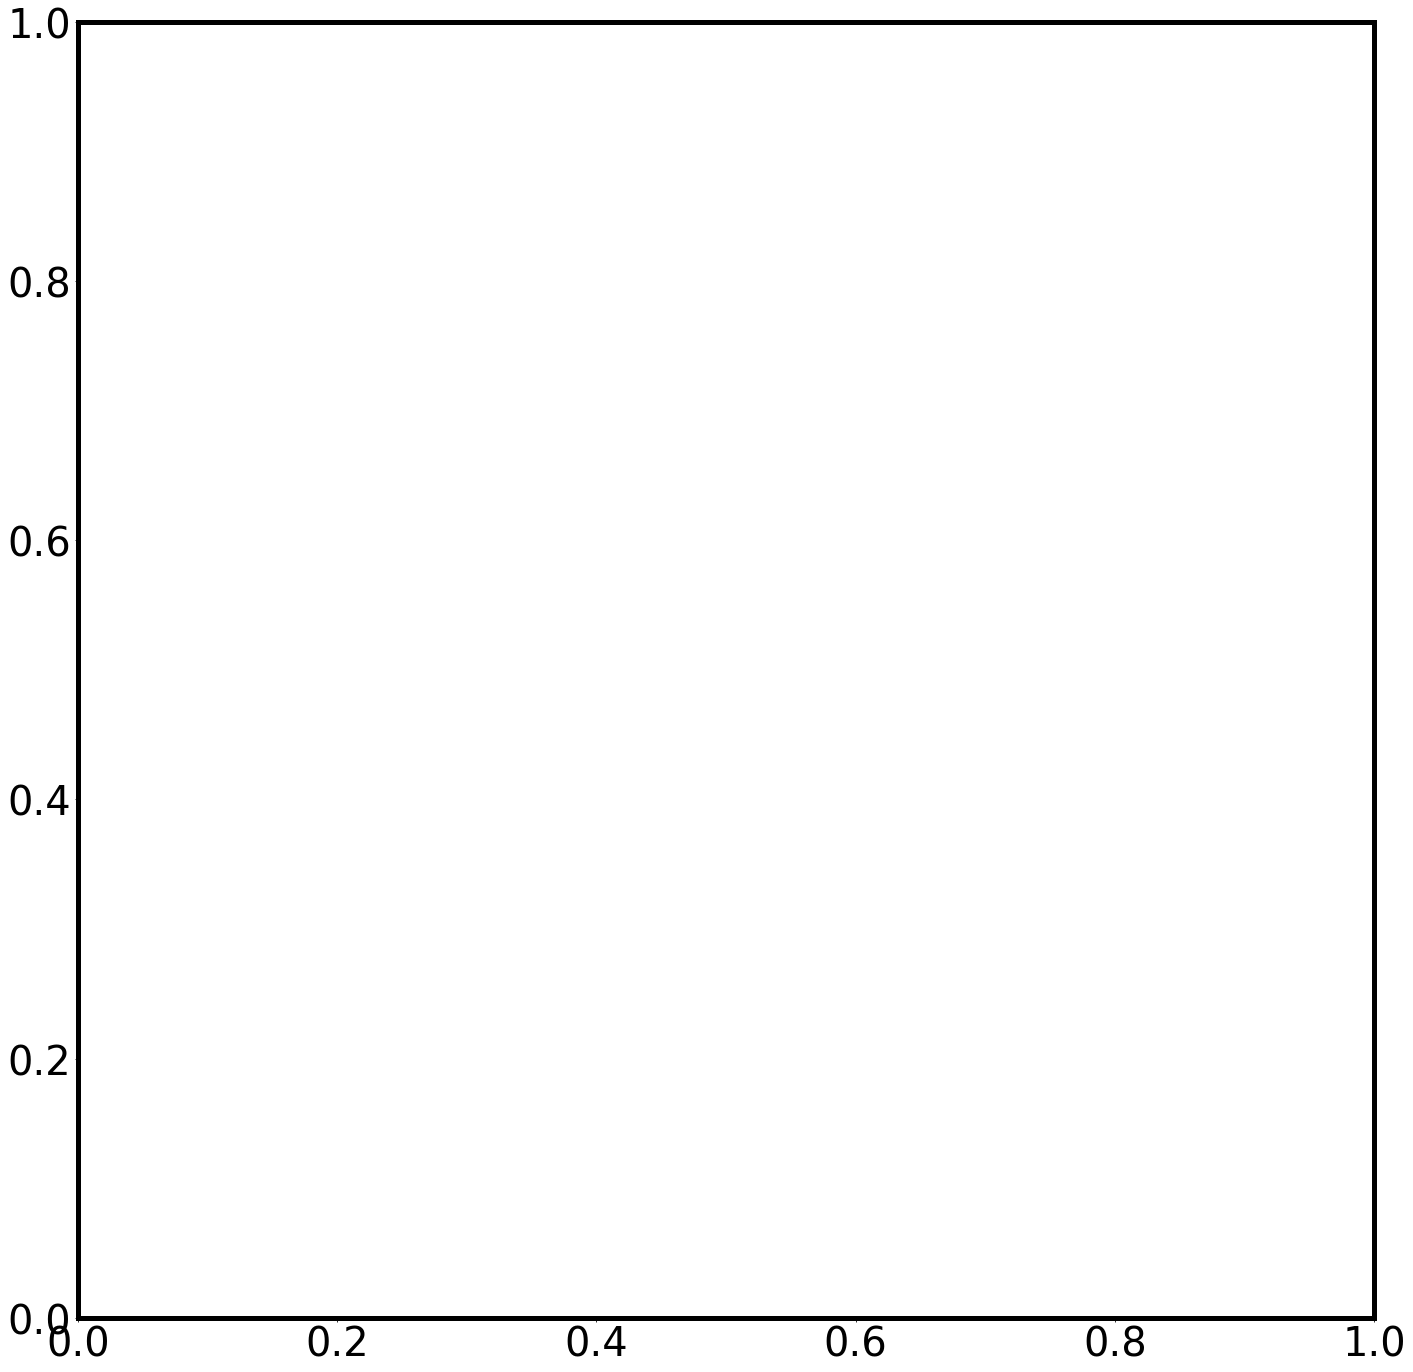

In [19]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51e_almaimf_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           norm = colors.PowerNorm(gamma=0.5,vmin=-0.0035380786497514836,vmax=0.2755892260142631))


sky1 = wcs_w51e_hr_b6.pixel_to_world(xylim1[0],xylim1[1])
sky2 = wcs_w51e_hr_b6.pixel_to_world(xylim2[0],xylim2[1])

pix1 = wcs_w51e_almaimf_b6.world_to_pixel(sky1)
pix2 = wcs_w51e_almaimf_b6.world_to_pixel(sky2)
ax1.set_xlim(pix1[0],pix2[0])
ax1.set_ylim(pix1[1],pix2[1])
ax1.set_xticks([])
ax1.set_yticks([])
plt.savefig('w51e_north_lr.png')

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51e_hr_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           vmin=-0.00031168037547342546,vmax=0.003998109940627469)
xylim1 = [6450, 3300]
xylim2 = [8000, 6000]
ax1.set_xlim(xylim1[0], xylim2[0])
ax1.set_ylim(xylim1[1], xylim2[1])
ax1.set_xticks([])
ax1.set_yticks([])
add_scale_bar(ax1,6800,3600, 5000*u.au,scale_w51e_hr, 5.41*u.kpc,xoffset=-0.35,unit='au')

plt.savefig('w51e_south_hr.png')


In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51e_almaimf_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           norm = colors.PowerNorm(gamma=0.5,vmin=-0.0035380786497514836,vmax=0.2755892260142631))

sky1 = wcs_w51e_hr_b6.pixel_to_world(xylim1[0],xylim1[1])
sky2 = wcs_w51e_hr_b6.pixel_to_world(xylim2[0],xylim2[1])

pix1 = wcs_w51e_almaimf_b6.world_to_pixel(sky1)
pix2 = wcs_w51e_almaimf_b6.world_to_pixel(sky2)
ax1.set_xlim(pix1[0],pix2[0])
ax1.set_ylim(pix1[1],pix2[1])
ax1.set_xticks([])
ax1.set_yticks([])
plt.savefig('w51e_south_lr.png')

In [ ]:
fitsdata_w51n_almaimf_b6 = fits.open(w51n_b6_almaimf)
image_w51n_almaimf_b6 = fitsdata_w51n_almaimf_b6[0].data
if len(image_w51n_almaimf_b6.shape)>2:
    image_w51n_almaimf_b6 = fitsdata_w51n_almaimf_b6[0].data[0][0]
wcs_w51n_almaimf_b6 = WCS(fitsdata_w51n_almaimf_b6[0].header,naxis=2)


fitsdata_w51n_hr_b6 = fits.open(w51n_b6_calibrated_pbcor)
image_w51n_hr_b6 = fitsdata_w51n_hr_b6[0].data
if len(image_w51n_hr_b6.shape)>2:
    image_w51n_hr_b6 = fitsdata_w51n_hr_b6[0].data[0][0]
wcs_w51n_hr_b6 = WCS(fitsdata_w51n_hr_b6[0].header,naxis=2)

scale_w51n_hr = wcs_w51n_hr_b6.proj_plane_pixel_scales()[0]


fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51n_hr_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           vmin=-0.00031168037547342546,vmax=0.003998109940627469)
xylim1 = [6700, 6600]
xylim2 = [9300, 8200]
ax1.set_xlim(xylim1[0], xylim2[0])
ax1.set_ylim(xylim1[1], xylim2[1])
ax1.set_xticks([])
ax1.set_yticks([])
xylim = np.vstack((xylim1, xylim2)).T

add_scale_bar(ax1,7100,6800, 5000*u.au,scale_w51n_hr, 5.41*u.kpc,xoffset=-0.5,unit='au')

plt.savefig('w51n_hr.png')

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.imshow(image_w51n_almaimf_b6, origin='lower',cmap=plt.get_cmap('inferno'),
           norm = colors.PowerNorm(gamma=0.5,vmin=-0.0035380786497514836,vmax=0.2755892260142631))

sky1 = wcs_w51n_hr_b6.pixel_to_world(xylim1[0],xylim1[1])
sky2 = wcs_w51n_hr_b6.pixel_to_world(xylim2[0],xylim2[1])

pix1 = wcs_w51n_almaimf_b6.world_to_pixel(sky1)
pix2 = wcs_w51n_almaimf_b6.world_to_pixel(sky2)
ax1.set_xlim(pix1[0],pix2[0])
ax1.set_ylim(pix1[1],pix2[1])
ax1.set_xticks([])
ax1.set_yticks([])
plt.savefig('w51n_lr.png')